# Karpathy Stanford Visual Recognition Course
## Neural network a case study

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate some data
Lets generate a classification dataset that is not easily linearly separable. Our favorite example is the spiral dataset.

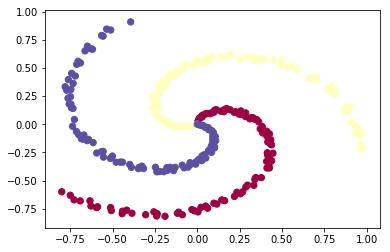

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(j * N, (j+1) * N)
    r = np.linspace(0.0, 1,  N) # radius
    theta = np.linspace(j * 4, (j+1) * 4, N) + np.random.rand(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(theta), r * np.cos(theta)]
    y[ix] = j
# lets visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
    

## Initialize parameters
We would like to initialize weight matrix and bias vector randomly:

In [3]:
# intialize parameters randomly
W = 0.001 * np.random.randn(D, K) # why we didn't use W=W*np.sqrt(2/D)
b = np.zeros([1, K])

## Compute the Score
Since it is a linear classifier, we can compute all the class scores with one matric multiplication

In [4]:
scores = np.dot(X, W) + b

## Compute Loss
we can compute the softmax loss for each example i with the following equation
\begin{equation}
L_i=-log(\frac{e^f_{yi}}{\sum_je^j})
\end{equation}
And the total loss of all data and weight regularization is:
\begin{equation}
L = 1/N\sum_iL_i + \frac{1}{2}\lambda\sum_k\sum_lW_{kl}
\end{equation}

In [5]:
num_examples = X.shape[0]
exp_prob = np.exp(scores)
# compute normalized probabilities
probabilities = exp_prob/np.sum(exp_prob, axis=1, keepdims=True)
# get log probabilities of correct class or L_i at the above formula
correct_logprob = -np.log(probabilities[range(num_examples), y])
data_loss = np.sum(correct_logprob)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss
print("The initial loss with random initialization is: %.2f"%loss)


The initial loss with random initialization is: 1.10


## Computing Analytinc gradient of loss function
In the course notes an intermediate variable p is introduced for sake of computation and derviative of loss is computed as below:
\begin{equation}
p_k = \frac{e^f_k}{\sum_ie^f_i}\\
L_i = -log(p_{y_i})\\
\frac{\partial L_i}{\partial f_k} = p_k - 1(y_i = k)
\end{equation}
The last derivation is the result of analytic gradient of loss that is computed directly at th course notes, however, I couldn't figure out how! \TODO: proov it in the future.

In [6]:
# pk int the above formulas is each element of probabilities
# dscore is dL_i/df_k
dscores = probabilities
dscores[range(num_examples), y] -= -1
dscores /= num_examples

In [7]:
dw = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dw += reg*W

## Performing parameter updated
it's simple, just subtract each parameter from its gradient with a step_size

In [8]:
W += -step_size*dw
b += -step_size*db

## Perform a simple parameter update in iteration

In [9]:
iteration_num = 200
for i in xrange(iteration_num):
    # get class scores
    scores = np.dot(X, W) + b
    
    probabilities = np.exp(scores)
    probabilities /=  np.sum(probabilities, axis=1, keepdims=True)
    
    correct_logprob = -np.log(probabilities[range(num_examples), y])
    data_loss = np.sum(correct_logprob)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("For iteration: %d"%i)
        print("Data loss: {}, Reg loss: {}, Total loss: {}".format(data_loss, reg_loss, loss))
    
    # compute gradient and perform parameter update
    dscores = probabilities
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg * W
    
    W -= step_size * dW
    b -= step_size * db
    

For iteration: 0
Data loss: 1.13216530175, Reg loss: 1.71799671903e-05, Total loss: 1.13218248172
For iteration: 10
Data loss: 0.90852562433, Reg loss: 0.000862692901536, Total loss: 0.909388317231
For iteration: 20
Data loss: 0.82463813187, Reg loss: 0.0024698356751, Total loss: 0.827107967545
For iteration: 30
Data loss: 0.785356640407, Reg loss: 0.00402636479362, Total loss: 0.789383005201
For iteration: 40
Data loss: 0.763984017166, Reg loss: 0.00539566310943, Total loss: 0.769379680276
For iteration: 50
Data loss: 0.751150512512, Reg loss: 0.00657324675331, Total loss: 0.757723759265
For iteration: 60
Data loss: 0.74290072647, Reg loss: 0.00758123522847, Total loss: 0.750481961699
For iteration: 70
Data loss: 0.737327220724, Reg loss: 0.00844470866196, Total loss: 0.745771929386
For iteration: 80
Data loss: 0.733416437635, Reg loss: 0.00918620818636, Total loss: 0.742602645821
For iteration: 90
Data loss: 0.73058906257, Reg loss: 0.0098248026704, Total loss: 0.740413865241
For ite

## Evaluate accuracy on train data

In [10]:
scores = np.dot(X, W) + b
predicted_labels = np.argmax(scores, axis=1)
print("The training accuracy is: %.2f" % np.mean(predicted_labels==y))

The training accuracy is: 0.53


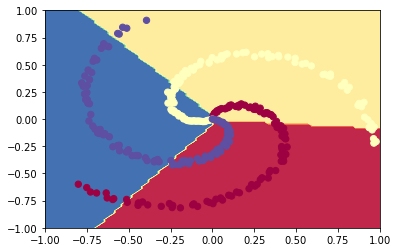

In [11]:
# Visualize trained linear moder
data_range = np.linspace(-1, 1, 100)
X_meshgrid, Y_meshgrid = np.meshgrid(data_range, data_range)
Z_meshgrid = np.dot(np.c_[X_meshgrid.flatten(), Y_meshgrid.flatten()], W) + b
plt.contourf(X_meshgrid, Y_meshgrid, np.argmax(Z_meshgrid, axis=1).reshape(X_meshgrid.shape), c=y, s=40, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## Train a simple one layer neural network

In [21]:
hidden_size = 100
W0 = 0.01 * np.random.randn(D, hidden_size)
b0 = np.zeros([1, hidden_size])
W1 = 0.01 * np.random.randn(hidden_size, K)
b1 = np.zeros([1, K])
iteration_num = 20000
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

for i in xrange(iteration_num):
    
    hidden_layer = np.maximum(0, np.dot(X, W0) + b0)
    scores = np.dot(hidden_layer, W1) + b1
    probabilities = np.exp(scores)
    probabilities /= np.sum(probabilities, axis=1, keepdims=True)
    
    correct_logprob = -np.log(probabilities[range(num_examples), y])
    data_loss = np.sum(correct_logprob)/num_examples
    reg_loss = 0.5 * reg * (np.sum(W0*W0) + np.sum(W1*W1))
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("For iteration: %d"%i)
        print("Data loss: {}, Reg loss: {}, Total loss: {}".format(data_loss, reg_loss, loss))
    
    dscores = probabilities
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    dW1 = np.dot(hidden_layer.T, dscores)
    db1 = np.sum(dscores, axis=0, keepdims=True)
    dhidden = np.dot(dscores, W1.T)
    dhidden[hidden_layer <= 0] = 0
    dW0 = np.dot(X.T, dhidden)
    db0 = np.sum(dhidden, axis=0, keepdims=True)
    
    dW1 += reg * W1
    dW0 += reg * W0
    
    W0 -= step_size * dW0
    b0 -= step_size * db0
    W1 -= step_size * dW1
    b1 -= step_size * db1


For iteration: 0
Data loss: 1.09855198868, Reg loss: 2.54253345577e-05, Total loss: 1.09857741401
For iteration: 1000
Data loss: 0.159983324125, Reg loss: 0.106281524656, Total loss: 0.266264848781
For iteration: 2000
Data loss: 0.12956738508, Reg loss: 0.118767781486, Total loss: 0.248335166566
For iteration: 3000
Data loss: 0.117965155603, Reg loss: 0.123291357794, Total loss: 0.241256513397
For iteration: 4000
Data loss: 0.107760698022, Reg loss: 0.126391819671, Total loss: 0.234152517693
For iteration: 5000
Data loss: 0.10316335702, Reg loss: 0.126582313716, Total loss: 0.229745670736
For iteration: 6000
Data loss: 0.102325061624, Reg loss: 0.125621433217, Total loss: 0.227946494842
For iteration: 7000
Data loss: 0.102021755963, Reg loss: 0.125126145577, Total loss: 0.227147901541
For iteration: 8000
Data loss: 0.102119437794, Reg loss: 0.124805311866, Total loss: 0.22692474966
For iteration: 9000
Data loss: 0.102168379499, Reg loss: 0.124690721185, Total loss: 0.226859100685
For i

## Evaluate on train data

In [22]:
scores = np.dot(np.maximum(0, np.dot(X, W0) + b0), W1) + b1
predicted_labels = np.argmax(scores, axis=1)
print("Accuracy on train data is: %.2f"%np.mean(predicted_labels==y))

Accuracy on train data is: 0.99


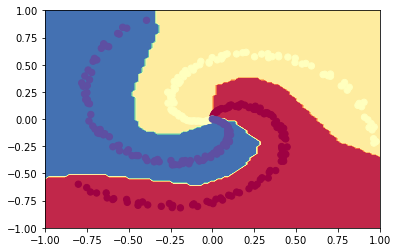

In [23]:
# Visualize trained linear moder
data_range = np.linspace(-1, 1, 100)
X_meshgrid, Y_meshgrid = np.meshgrid(data_range, data_range)
Z_meshgrid = np.dot(np.maximum(0, np.dot(np.c_[X_meshgrid.flatten(), Y_meshgrid.flatten()], W0) + b0), W1) + b1
plt.contourf(X_meshgrid, Y_meshgrid, np.argmax(Z_meshgrid, axis=1).reshape(X_meshgrid.shape), c=y, s=40, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()